In [46]:
# Import the fucking useful libraries =)
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import helpers

%matplotlib inline
%load_ext autoreload
%autoreload 2

# There's a lot of columns in the DF. 
# Therefore, we add this option so that we can see more columns
pd.options.display.max_columns = 100

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
df = pd.read_csv('pred_pyspark_als_3dec.csv')
df = helpers.extract_from_original_table(df)
df.head()

,UserID,MovieID,Rating
0,37,1,3.212081
1,73,1,3.092313
2,156,1,3.712342
3,160,1,3.294452
4,248,1,3.485674


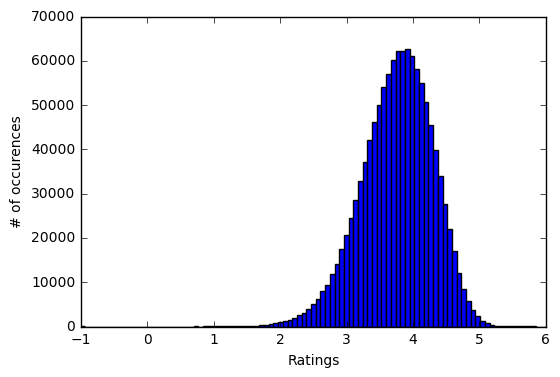

In [48]:
# scale = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6]
def distribution(serie, s):
    if s == 1:
        scale = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6]
    if s == 2:
        scale = np.linspace(-1, 6, 100)

    plt.hist(serie, bins=scale)
    plt.xlabel('Ratings')
    plt.ylabel('# of occurences')
    plt.show
    
distribution(df['Rating'], 2)

## Variance of the set

In [51]:
m = df['Rating'].mean()

def rescale(df):
    x = df['Rating']
    new_x = (x-m) * 1.2 + m
    
    # bounds
    if new_x < 0:
        new_x = 0
    if new_x > 5:
        new_x = 5
        
    return new_x

df['Rating2'] = df.apply(rescale, axis=1)

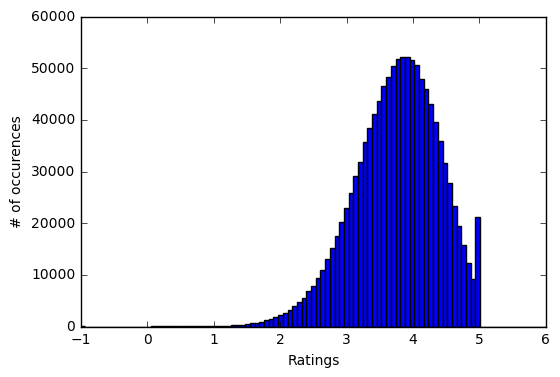

In [52]:
distribution(df['Rating2'], 2)

In [44]:
def form_id(df):
    string = 'r' + str(df['UserID']) + '_c' + str(df['MovieID'])
    return string

def prepare_to_prediction(df):
    df2 = pd.DataFrame.copy(df)
    df2['Id'] = df2.apply(form_id, axis=1) 
    df2['Prediction'] = df2['Rating2']
    return df2[['Id', 'Prediction']]

df_predict = prepare_to_prediction(df)

In [45]:
df_predict.to_csv('pred_pyspark_als_rescaled.csv', index=False)